# <span style="color:DarkOliveGreen">Data Gathering

<span style="color:Olive">__Summary:__ In this file we shall download the data from Bloomberg and save it as csv file.

In [1]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
import os
from xbbg import blp, pipeline
np.random.seed(0)

from xbbg import blp, pipeline
import datetime
# BDay is business day, not birthday...
from pandas.tseries.offsets import BDay

today = datetime.datetime.today()

In [18]:
# User defined names
index = "CDX.NA.IG"
ticker = "CDX IG CDSI GEN 5Y Corp"
# Define the date range
start_date = '2018-01-01'
end_date = (today - BDay(1)).strftime('%Y-%m-%d')

In [19]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\rsingh\Desktop\World Quant\Capstone\GitHub_main\Data


In [20]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

## <span style="color:DarkOliveGreen">Functions

In [21]:
def get_bbg_df(ticker, field, col_name, start_date, end_date):
    df = pd.DataFrame()
    df = blp.bdh(tickers=ticker,flds=field,start_date=start_date,end_date=end_date,Per='D', Fill='P', Days='A',
                )[ticker]
    df[col_name] = df[field]
    df.drop([field], axis=1,inplace=True)
    return df

## <span style="color:DarkOliveGreen">Download the Data

In [22]:
IG_bid_df = get_bbg_df('CDX IG CDSI GEN 5Y Corp', 'px_bid', 'IG_BID', start_date, end_date)
IG_ask_df = get_bbg_df('CDX IG CDSI GEN 5Y Corp', 'px_ask', 'IG_ASK', start_date, end_date)
IG_mid_df = get_bbg_df('CDX IG CDSI GEN 5Y Corp', 'px_mid', 'IG_MID', start_date, end_date)
SPX_df = get_bbg_df('SPX Index', 'px_last', 'SPX', start_date, end_date)
VIX_df = get_bbg_df('VIX Index', 'px_last', 'VIX', start_date, end_date)
SPOT_df = get_bbg_df('H15T3M Index', 'px_last', 'SPOT', start_date, end_date)

IG_ABS_df = IG_bid_df
IG_ABS_df['IG_ABS'] = (IG_ask_df.values - IG_bid_df.values)
IG_ABS_df.drop('IG_BID',axis=1,inplace=True)

In [23]:
UST_tenors = ['3M','6M','1Y','2Y','3Y','5Y','7Y','10Y','20Y','30Y']
for t in UST_tenors:
    if t=='3M':
        UST_df = get_bbg_df('H15T'+t+' Index', 'px_mid', "UST_"+t, start_date, end_date)
    else:
        UST_df = pd.concat([UST_df,get_bbg_df('H15T'+t+' Index', 'px_mid', "UST_"+t, start_date, end_date)],axis=1)

In [26]:
df = pd.concat([IG_ABS_df, SPX_df, VIX_df, SPOT_df,UST_df,IG_mid_df], axis=1)

In [27]:
df

,IG_ABS,SPX,VIX,SPOT,UST_3M,UST_6M,UST_1Y,UST_2Y,UST_3Y,UST_5Y,UST_7Y,UST_10Y,UST_20Y,UST_30Y,IG_MID
2018-01-01,0.574,2673.61,11.04,1.39,1.39,1.53,1.76,1.89,1.98,2.20,2.33,2.40,2.58,2.74,49.020
2018-01-02,0.400,2695.81,9.77,1.44,1.44,1.61,1.83,1.92,2.01,2.25,2.38,2.46,2.64,2.81,48.455
2018-01-03,0.444,2713.06,9.15,1.41,1.41,1.59,1.81,1.94,2.02,2.25,2.37,2.44,2.62,2.78,47.095
2018-01-04,0.467,2723.99,9.22,1.41,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79,45.877
2018-01-05,0.475,2743.15,9.22,1.39,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81,45.518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03,0.852,4136.48,18.33,4.70,4.70,4.82,4.79,4.30,3.96,3.67,3.61,3.53,3.77,3.63,69.044
2023-02-04,0.852,4136.48,18.33,4.70,4.70,4.82,4.79,4.30,3.96,3.67,3.61,3.53,3.77,3.63,69.044
2023-02-05,0.852,4136.48,18.33,4.70,4.70,4.82,4.79,4.30,3.96,3.67,3.61,3.53,3.77,3.63,69.044
2023-02-06,0.569,4111.08,19.43,4.71,4.71,4.89,4.85,4.44,4.10,3.81,3.73,3.63,3.82,3.67,70.166


## <span style="color:DarkOliveGreen">Save the Data

In [29]:
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")
df.to_csv("input_data.csv", index=True)

### <span style="color:DarkOliveGreen">Time Series Plot of CDX.NA.IG

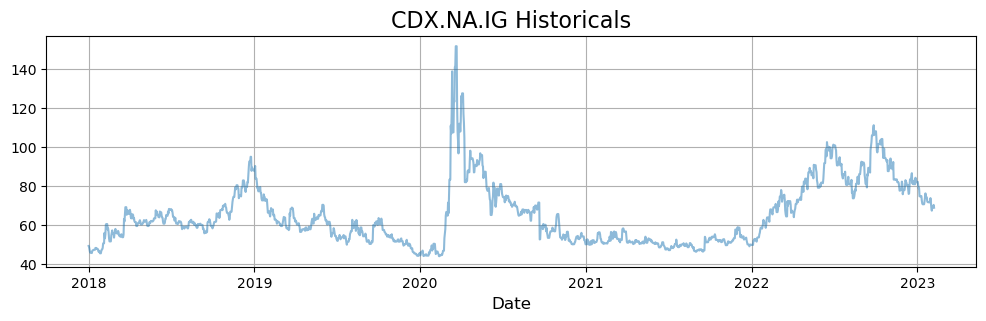

In [31]:
plt.figure(figsize=(12,3))
plt.plot(df['IG_MID'], alpha=0.5)
plt.title('{} Historicals'.format(index), fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.grid()
plt.show()